<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 2 // Statistical Treatment for Datasets</font></h1>

Title: Assigment 2\
Last Updated: Maret 16, 2022\
Author: Noer Ardiansyah Laksana

# 1. Data Preparation

Langkah pertama yang harus dilakukana dalah Data Preparation atau mempersipakan data, agar data dapat dianalisis dengan baik dan benar.

##### --- Impor seluruh package yang kemungkinan akan digunakan pada project ini sedari awal ---

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mat
from scipy.stats import norm
from scipy.stats import f_oneway

##### --- Load data set yang akan digunakan dalam project ini ---

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')
print ('Mantap, berhasil kebaca!')

Mantap, berhasil kebaca!


--- Melihat bentuk data yang ada dalam data set, dengan melihat 5 kolom teratas dan 5 kolom terbawah ---

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


--- Melihat info berapa banyak data yang disajikan dan info dari masing-masing columns dataset yang akan diolah ---

In [5]:
df.shape

(84548, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

 --- Terlihat bahwa columns dengan nama "Unnamed : 0", EASE-MENT, dan beberapa kolom lainnya tidak memiliki peran penting dalam analisis data karena memiliki data yang blank, oleh karena itu sebaiknya kita harus menghapusnya dari dataset ---

In [7]:
df_new= pd.read_csv('nyc-rolling-sales.csv')

In [8]:
df_new = df.drop(columns=['Unnamed: 0', 'EASE-MENT','ADDRESS','APARTMENT NUMBER', 'ZIP CODE'])
df_new.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00


In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   RESIDENTIAL UNITS               84548 non-null  int64 
 8   COMMERCIAL UNITS                84548 non-null  int64 
 9   TOTAL UNITS                     84548 non-null  int64 
 10  LAND SQUARE FEET                84548 non-null  object
 11  GROSS SQUARE FEET               84548 non-null  object
 12  YEAR BUILT                      84548 non-null

---- Melihat Jumlah Missing Values Pada Setiap Kolom Baru ---

In [10]:
df_new.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Disini terlihat bahwa sudah tidak ada lagi nilai null pada setiap kolom dari dataset yang kita akan olah, namun tidak ada salahnya kita untuk melakukan langkah preventif untuk mengganti nilai null yang ada pada setiap kolom, seandainya memang ada.

In [11]:
categoricals_columns = ['TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'YEAR BUILT']
for cat_col in categoricals_columns:
    df_new[cat_col].fillna(df_new[cat_col].mode()[0],inplace=True)

Mengganti nilai atau null pada categorical columns dengan modus yang ada pada columns tersebut.

In [12]:
float_columns = ['BOROUGH']
for float_col in float_columns:
    df_new[float_col].fillna(df_new[float_col].median(),inplace=True)

In [13]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    df_new[col] = pd.to_numeric(df_new[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df_new[col] = df_new[col].astype('category')

df_new['SALE DATE'] = pd.to_datetime(df_new['SALE DATE'], errors='coerce')

Chek missing values yang ada pada dataset yang telah diolah

In [14]:
missing = df_new.isnull().sum()/len(df_new)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df_new.isnull().sum()[df_new.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


In [15]:
print(df_new[(df_new['LAND SQUARE FEET'].isnull()) & (df_new['GROSS SQUARE FEET'].notnull())].shape)
print(df_new[(df_new['LAND SQUARE FEET'].notnull()) & (df_new['GROSS SQUARE FEET'].isnull())].shape)

(6, 17)
(1366, 17)


There are 1372 rows that can be filled in with their approximate values.

In [16]:
df_new['LAND SQUARE FEET'] = df_new['LAND SQUARE FEET'].mask((df_new['LAND SQUARE FEET'].isnull()) & (df_new['GROSS SQUARE FEET'].notnull()), df_new['GROSS SQUARE FEET'])
df_new['GROSS SQUARE FEET'] = df_new['GROSS SQUARE FEET'].mask((df_new['LAND SQUARE FEET'].notnull()) & (df_new['GROSS SQUARE FEET'].isnull()), df_new['LAND SQUARE FEET'])

In [17]:
#  Check for duplicates before

print(sum(df_new.duplicated()))

df_new[df_new.duplicated(keep=False)].sort_values(['NEIGHBORHOOD']).head(10)

# df.duplicated() automatically excludes duplicates, to keep duplicates in df we use keep=False

# in df.duplicated(df.columns) we can specify column names to look for duplicates only in those mentioned columns.

959


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
48,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,396,20,C6,0,0,0,NaN,NaN,1920,2,C6,NaN,2017-03-20
49,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,396,20,C6,0,0,0,NaN,NaN,1920,2,C6,NaN,2017-03-20
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21


Dataset memiliki 765 baris data ganda, oleh karenanya kita harus menghapus data tersebut agar tidak mengganggu proses analisis.

In [18]:
df_new.drop_duplicates(inplace=True)

print(sum(df_new.duplicated()))

0


## Exploratory data analysis

Now, let's get a simple descriptive statistics with `.describe()` function for `COMMERCIAL UNITS` features.

In [19]:
df_new[df_new['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,78597.000000,78597.000000,78597.000000,78597.000000,78597.0,78597.000000,5.270000e+04,5.270000e+04,78597.000000,6.554700e+04
mean,3.005293,4273.930455,395.950151,1.672354,0.0,1.704785,3.129663e+03,2.691450e+03,1780.920366,9.961302e+05
std,1.298328,3587.628481,671.994361,9.047616,0.0,9.043355,2.929532e+04,2.772100e+04,551.273774,3.331151e+06
min,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1330.000000,23.000000,0.000000,0.0,1.000000,1.600000e+03,9.750000e+02,1920.000000,2.400000e+05
50%,3.000000,3343.000000,52.000000,1.000000,0.0,1.000000,2.295000e+03,1.600000e+03,1940.000000,5.300000e+05
75%,4.000000,6360.000000,1003.000000,2.000000,0.0,2.000000,3.300000e+03,2.388000e+03,1967.000000,9.245710e+05
max,5.000000,16322.000000,9106.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

- There are zipcodes with 0 value
- Can block/lot numbers go up to 16322?
- Most of the properties have 2 unit and maximum of 1844 units? The latter might mean some company purchased a building. This should be treated as an outlier.
- Other columns also have outliers which needs further investigation.
- Year column has a year with 0
- Most sales prices less than 10000 can be treated as gift or transfer fees.

# Menghitung atau mengukur Sentral Tendesi dari satu kolom

Mean dan Median

In [47]:
print("Mean Borough= ", df_new['BOROUGH'].mean())


Mean Borough=  3.0002751558219383


In [48]:
print("Median Borough = ",df_new['BOROUGH'].median())

Median Borough =  3.0


Analisis

Setelah menghitung sentral tendensi mean dari kolom borough, terlihat bahwa nilai mean dan median memiliki nilai yang hampir sama bahakan dapat dikatakan sama apabila menggunakan prinsip pembulatan 2 angka dibelakang koma. Hal tersebut merepresentasikan bahwa grafik yang terbuat harus memiliki bentuk yang cukup baik. 

Modus

In [49]:
cols = ['BOROUGH']
for col in cols:
    print("Modus "+col+" = ",df_new[col].mode()[0])

Modus BOROUGH =  4


# Measure of Spread


#### Range

In [50]:
print('Range Borough ', (df_new['BOROUGH'].max() - df_new['BOROUGH'].min()))

Range Borough  4


### Variance

In [52]:
print('Sampel Variance dari Borough = ', df_new['BOROUGH'].var(ddof=1))

Sampel Variance dari Borough =  1.6600348575341706


## Standar Deviasi

In [53]:
print('Sampel Standard Deviation dari Borough = ', df_new['BOROUGH'].var(ddof=1)**0.5)

Sampel Standard Deviation dari Borough =  1.2884233999482355


# Probability Distribution

### Normal Distribituon

Text(0, 0.5, 'Frekuensi')

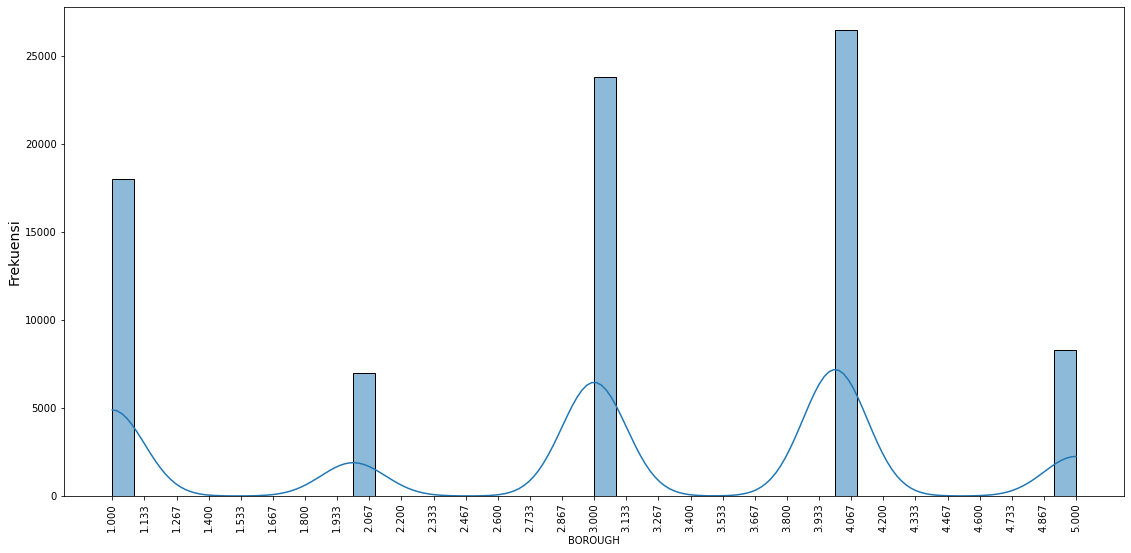

In [55]:
df_total_units = df_new['BOROUGH']
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
count, bin_edge_gross_square_feet = np.histogram(df_total_units,bins=30)
sns.histplot(df_total_units,kde=True, ax=ax)
ax.set_xticks(bin_edge_gross_square_feet)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi', fontsize=14)

#### --- Insight-

Terlihat bahawa grafik yang ada terlihat seperti anomali, namun yang sebenarnya terjadi adalah grafik yang terjadi sudah normal terbentuk seperti itu karena data yang ada pada kolom borough hanya menunjukan angka pasti seperti 1,2,3,4,5 tidak memiliki nilai apapun bahka hanya 1 angka dibelakang koma.

## Menghitung Confidence Intervals

Menghitung rata-rata populasi yang ada.

In [57]:
df_totalunits = df_new[['TOTAL UNITS']].dropna()

In [64]:
rata_rata = df_totalunits.mean()
simpangan_baku = df_totalunits.std()
se = simpangan_baku/np.sqrt(len(df_totalunits))
z = 1.0

batas_bawah = rata_rata - z * se
batas_atas = rata_rata + z * se
print("Rata-rata jumlah rumah yang terjual pada sekali penjualan di NYC adalah berkisar %.3f sampai dengan %.3f" % (batas_bawah, batas_atas))

Rata-rata jumlah rumah yang terjual pada sekali penjualan di NYC adalah berkisar 2.132 sampai dengan 2.260


### Hipotesis
--- Apakah rata-rata jumlah unit terjual ketika satu kali transaksi sama pada setiap daerah yang berada di NYC? ---

In [65]:
print("Uji Hipotesis ")
data1 = df_new[df_new['BOROUGH'] == 1][['TOTAL UNITS']].dropna()
data2 = df_new[df_new['BOROUGH'] == 2][['TOTAL UNITS']].dropna()
data3 = df_new[df_new['BOROUGH'] == 3][['TOTAL UNITS']].dropna()
data4 = df_new[df_new['BOROUGH'] == 4][['TOTAL UNITS']].dropna()
data5 = df_new[df_new['BOROUGH'] == 5][['TOTAL UNITS']].dropna()
stat, p = f_oneway(data1, data2, data3, data4, data5)
print('stat = %.3f, p = %.3f' % (stat, p))
print('Hasil Kesimpulan:')
if p > 0.05:
    print('Sama')
else:
    print('Tidak Sama')

Uji Hipotesis 
stat = 16.741, p = 0.000
Hasil Kesimpulan:
Tidak Sama
